# This project aims to analyze the Stack Overflow survey for the 2020 year. The main goal is to elucidate the differences between two groups of countries: the developed and the underdeveloped  (as for the UN).

# I will focus on some questions that can highlight what the differences: salary, work hours, education, years coding and the languages used

In [1]:
# Importing the modules and doing some configuration
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

## This function will be used in a future analysis 

In [2]:
def language_extractor (df,col, sep):
    '''
    
    This function iterate trought the columns of the dataframe and splits the the resulting string
    with the provided separator. Then it adds to a dictionary.
    The column cannot have NANs values
    
    
    INPUT:
    df - pandas dataframe with string variables you want to separate
    col - list of columns you want to extract or a single string
    sep - the separator of the string as a string format
    
    OUTPUT:
    dic - a ordered dictionary with the string as key and the number of occurances as values
    '''
    
    if df[col].isna().any() == True:
        raise Exception("The data contais NAN values") 
    
    
    
    dic = {}
    
    
    
    for i in df[col]:
        lang_list = i.split(sep=sep)
        for l in lang_list:
            if l in dic:
                dic[l] += 1
            else:
                dic[l] = 1
    return dict(sorted(dic.items(), key=lambda item: item[1],reverse=True))

In [3]:
#reading the dataframe
df = pd.read_csv(r"data/survey_results_public.csv")

In [4]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [5]:
df.shape

(64461, 61)

In [6]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [7]:
#What is the percentage of NANs in Salary ?
df.ConvertedComp.isna().sum()/len(df)

0.4608212717767332

## For the purpose of this work i will work only with the entries that contains valid values for the salary as i want only professional coders.

In [8]:
# Removing the NANs in the salary column to get only the working coders
df_salary = df[df.ConvertedComp.isna() == False]

In [9]:
df_salary.ConvertedComp.isna().any()

False

In [10]:
df_salary.shape

(34756, 61)

In [11]:
df_salary.Country.nunique()

159

## I will separate the main dataframe in two for easy analysis

### # Creating a list of the developed countries (Very high human development) according to the UNDP (http://hdr.undp.org/sites/default/files/hdr2020.pdf) 

In [12]:
list_idh = ["Norway","Ireland","Switzerland","Hong Kong","Iceland","Germany","Sweden","Australia"
,"Netherlands","Denmark","Finland","Singapore","United Kingdom","Belgium","New Zealand","Canada"
,"United States","Austria","Israel","Japan","Liechtenstein","Slovenia","South Korea","Luxembourg"
,"Spain","France","Czechia","Malta","Estonia","Italy","United Arab Emirates","Greece","Cyprus"
,"Lithuania","Poland","Andorra","Latvia","Portugal","Slovakia","Hungary","Saudi Arabia","Bahrain"
,"Chile","Croatia","Qatar","Argentina","Brunei","Montenegro","Romania","Palau","Kazakhstan","Russia"
,"Belarus","Turkey","Uruguay","Bulgaria","Panama","Bahamas","Barbados","Oman","Georgia","Costa Rica"
,"Malaysia","Kuwait","Serbia","Mauritius"]


In [13]:
# Creating a dataframe with the developed countries
df_dev = df_salary[df_salary.Country.isin(list_idh)]

In [14]:
df_dev.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4
10,11,I am a developer by profession,Yes,23.0,13,Yearly,31000.0,40070.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Django;React.js,Angular;Angular.js;Django;React.js,Just as welcome now as I felt last year,40.0,10,2
11,12,I am a developer by profession,No,49.0,42,Monthly,1100.0,14268.0,Spain,European Euro,...,Easy,Appropriate in length,No,Mathematics or statistics,ASP.NET;jQuery,ASP.NET;jQuery,Just as welcome now as I felt last year,40.0,7,7
12,13,"I am not primarily a developer, but I write co...",Yes,53.0,14,Monthly,3000.0,38916.0,Netherlands,European Euro,...,Neither easy nor difficult,Too long,No,NaN,NaN,NaN,A lot less welcome now than last year,36.0,35,20


In [15]:
df_dev.shape

(26022, 61)

In [16]:
# creating a dataframe with the others countries
df_under = df_salary[~df_salary.Country.isin(list_idh)]

In [17]:
df_under.shape

(8734, 61)

In [18]:
df_under.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
43,44,I am a developer by profession,No,32.0,21,Yearly,244000.0,55893.0,Brazil,Brazilian real,...,Neither easy nor difficult,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,NaN,Just as welcome now as I felt last year,45.0,10,6
58,59,I am a developer by profession,No,38.0,15,Monthly,6000.0,16488.0,Brazil,Brazilian real,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;ASP.NET;jQuery,ASP.NET;jQuery;Laravel;Ruby on Rails,Just as welcome now as I felt last year,40.0,24,15
89,91,I am a developer by profession,Yes,28.0,25,Monthly,70000000.0,61476.0,Indonesia,Indonesian rupiah,...,Easy,Too long,No,"A health science (such as nursing, pharmacy, r...",Ruby on Rails,jQuery;Ruby on Rails,Not applicable - I did not use Stack Overflow ...,60.0,3,2
96,98,I am a developer by profession,No,29.0,15,Monthly,80000.0,41568.0,Czech Republic,Czech koruna,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,10,5
147,149,I am a developer by profession,Yes,36.0,31,Yearly,21000000.0,293196.0,India,Indian rupee,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,70.0,5,3


In [19]:
# Checking the NANs in columns for future use
df_dev.isna().sum()/len(df_dev)

Respondent                      0.000000
MainBranch                      0.000000
Hobbyist                        0.000000
Age                             0.107678
Age1stCode                      0.002267
CompFreq                        0.000000
CompTotal                       0.000000
ConvertedComp                   0.000000
Country                         0.000000
CurrencyDesc                    0.000000
CurrencySymbol                  0.000000
DatabaseDesireNextYear          0.255745
DatabaseWorkedWith              0.152679
DevType                         0.012105
EdLevel                         0.015064
Employment                      0.000769
Ethnicity                       0.103182
Gender                          0.068596
JobFactors                      0.043117
JobSat                          0.001460
JobSeek                         0.023864
LanguageDesireNextYear          0.080970
LanguageWorkedWith              0.032549
MiscTechDesireNextYear          0.271616
MiscTechWorkedWi

In [20]:
# Wich developed countries have the most developers?
top_dev = df_dev.groupby(by = 'Country').count().sort_values(by = "Respondent",
                                                             ascending=False).head(10).Respondent
top_dev

Country
United States     8152
United Kingdom    2588
Germany           2311
Canada            1345
France            1127
Netherlands        810
Poland             798
Australia          772
Spain              761
Italy              665
Name: Respondent, dtype: int64

In [21]:
# Wich underdeveloped  countries have the most developers?
top_und = df_under.groupby(by = 'Country').count().sort_values(by = "Respondent",
                                                               ascending=False).head(10).Respondent
top_und

Country
India                 2668
Brazil                1157
Russian Federation     618
Pakistan               330
Mexico                 314
Czech Republic         313
Ukraine                299
South Africa           299
Iran                   275
Bangladesh             184
Name: Respondent, dtype: int64

## Let's check the countries with more coders for each class

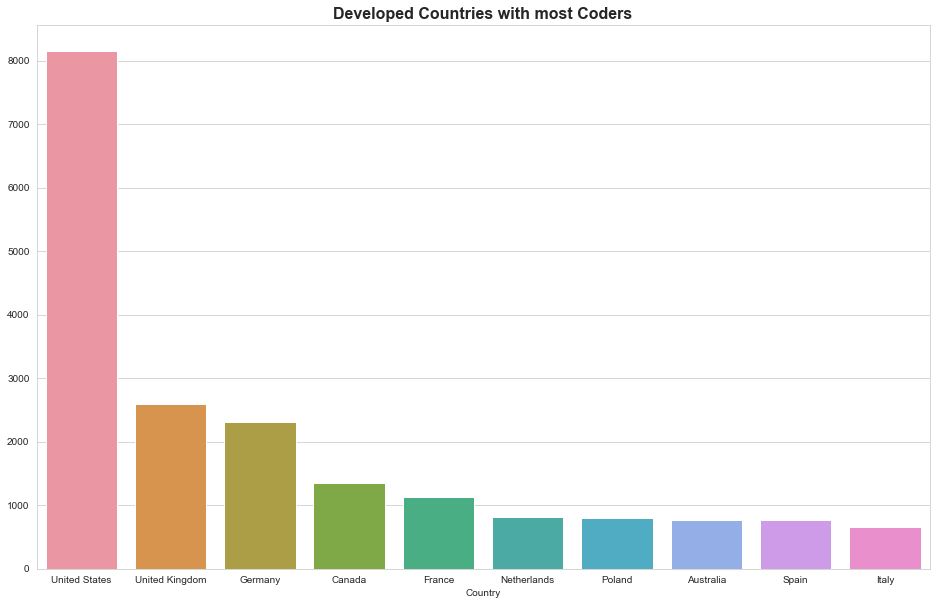

In [22]:
# Graphs of the developed and underdeveloped  countries with more coders
sns.set_style("whitegrid")
sns.set_palette("Paired", 9)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.title("Developed Countries with most Coders",fontsize= 16, fontweight='bold' )
ax = sns.barplot(top_dev.index, top_dev.values)


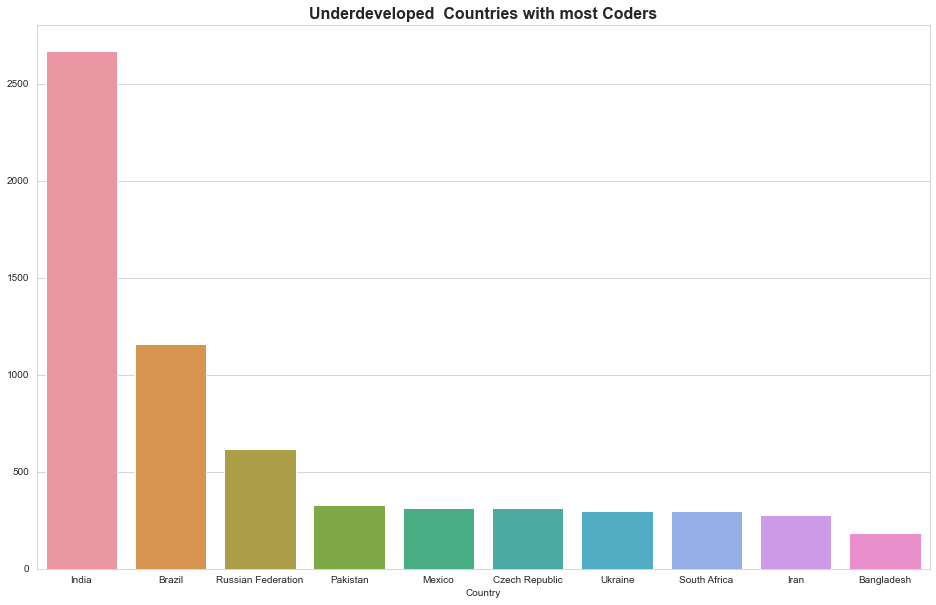

In [23]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.title("Underdeveloped  Countries with most Coders",fontsize= 16, fontweight='bold' )
ax = sns.barplot(top_und.index, top_und.values)

## In this part i will analyze wich languages the coders use. For this i will use the function created at the beginning of this notebook. The sum of languages is superior than the sum of respondents. This is because the same coder could use more than one language. 

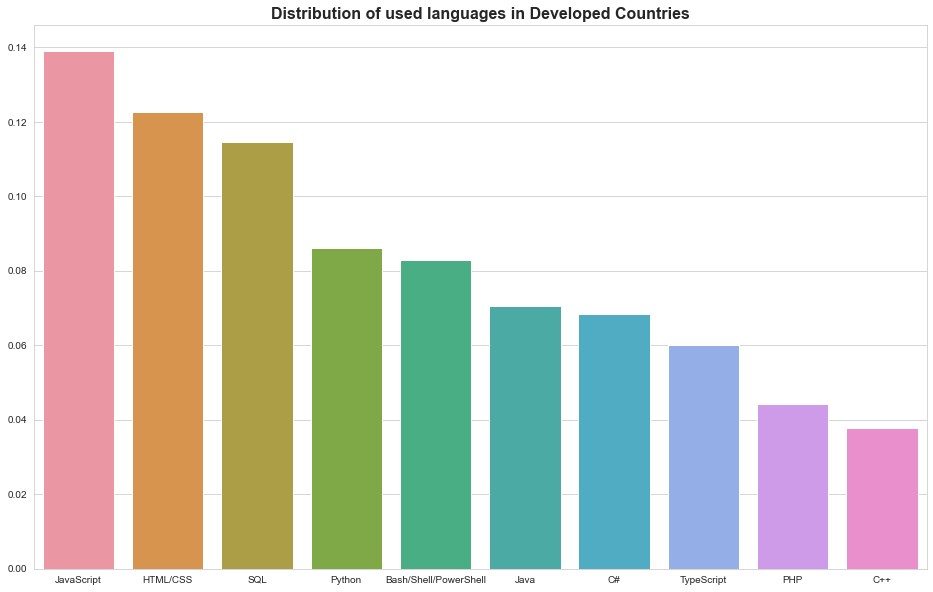

In [24]:
#Using the language extractor to create a graph of the languages used in the developed countries
df_dev = df_dev.dropna(subset= ["LanguageWorkedWith"],axis = 0)
lang_dev = language_extractor(df_dev,"LanguageWorkedWith",';')
x= list(lang_dev)[:10]
top = list(lang_dev.values())[:10]
y = [n / sum(list(lang_dev.values())) for n in top]
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.title("Distribution of used languages in Developed Countries",fontsize= 16, fontweight='bold' )
ax = sns.barplot(x,y)

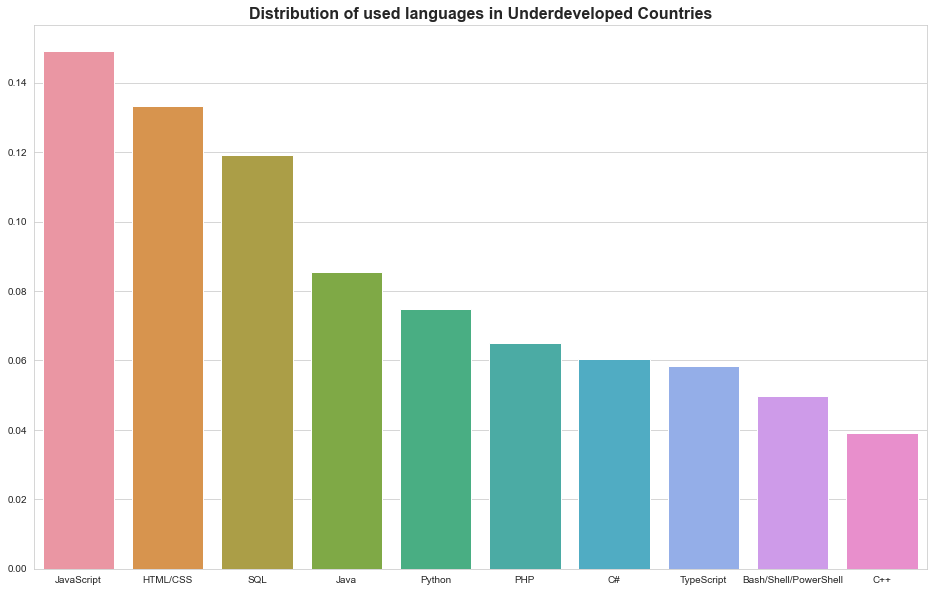

In [25]:
#Using the language extractor to create a graph of the languages used in the underdeveloped countries
df_under = df_under.dropna(subset= ["LanguageWorkedWith"],axis = 0)
lang_und = language_extractor(df_under,"LanguageWorkedWith",';')
x= list(lang_und)[:10]
top = list(lang_und.values())[:10]
y = [n / sum(list(lang_und.values())) for n in top]
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.title("Distribution of used languages in Underdeveloped Countries",fontsize= 16, fontweight='bold' )
ax = sns.barplot(x,y)


In [26]:
# Dataframe with the normalized language distribution for both class of countries and
# the difference between Developed and Underdeveloped countries
lan = pd.DataFrame(data= [lang_dev,lang_und], index=['Developed', 'Underdeveloped']).transpose()
lan.Developed = lan.Developed/ sum(lan.Developed)
lan.Underdeveloped = lan.Underdeveloped/ sum(lan.Underdeveloped)
lan["Diff"] = lan.Developed - lan.Underdeveloped
lan = lan.style.bar(subset=['Diff'], align='mid', color=['#d65f5f', '#5fba7d'])
lan

,Developed,Underdeveloped,Diff
JavaScript,0.139017,0.149105,-0.010088
HTML/CSS,0.122662,0.133238,-0.010576
SQL,0.114712,0.119279,-0.004567
Python,0.086115,0.074791,0.011324
Bash/Shell/PowerShell,0.082844,0.049660,0.033184
Java,0.070609,0.085361,-0.014752
C#,0.068392,0.060405,0.007987
TypeScript,0.060026,0.058447,0.001579
PHP,0.044308,0.065100,-0.020792
C++,0.037734,0.039140,-0.001406


## As we can see the top 3 languages are in the exact same order for both groups: JavaScript first followed by HTML/CSS and then SQL. The main differences appear in the 4th language and forth. In the developed countries Python appears in that position, it's in the 5th position in the underdeveloped, as Java is the 4 more popular language in this group. Java itself only appears in the 6th position on the developed countries.  Finally is noticeable that Bash/Shell/PowerShell is the 5th more used language in the developed group, but only appears in 9 in the other.
## This rank is interesting but the differences between groups aren't that great : the larger is  in Bash/Shell/PowerShell  with only 3,3%.

## First let's look for the difference between salaries

In [27]:
# Checking the basic statistics for the converted salary for both dataframes
pd.DataFrame(data= [df_dev.ConvertedComp.describe(), df_under.ConvertedComp.describe()],
             index=['Developed', 'Underdeveloped']).astype(int)

,count,mean,std,min,25%,50%,75%,max
Developed,25175,128207,252238,0,42804,68507,110000,2000000
Underdeveloped,8272,29687,80099,0,7032,15084,29320,2000000


In [28]:
#Creating a new column in the salary df to use in the boxplot
df_salary["HDI"] = np.where(df_salary['Country'].isin(list_idh), "developed", 'underdeveloped')

Text(0, 0.5, 'Salary')

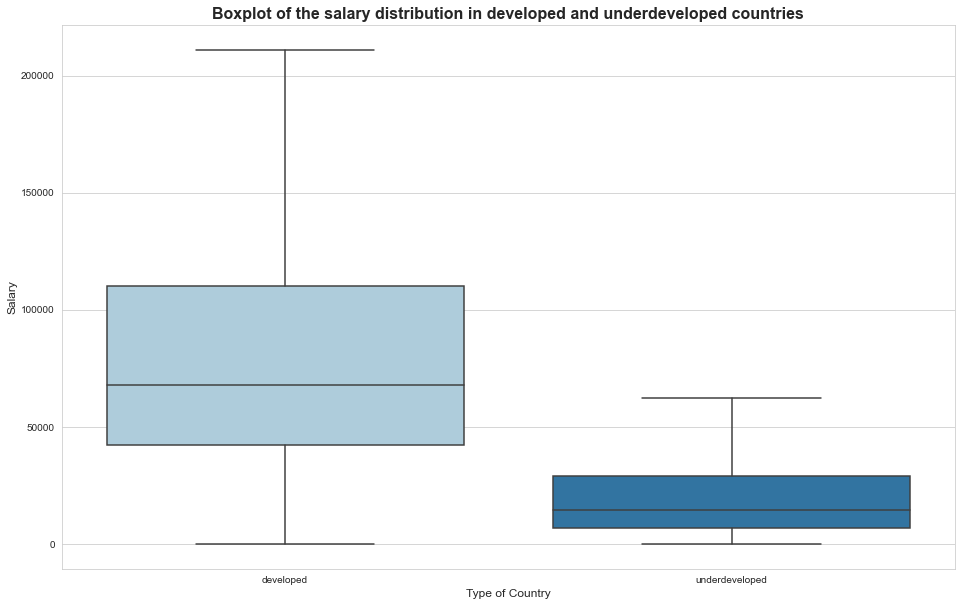

In [29]:
# creating the boxplot
fig = plt.gcf()
fig.set_size_inches( 16, 10)

plt.title("Boxplot of the salary distribution in developed and underdeveloped countries",fontsize= 16, fontweight='bold' )
ax = sns.boxplot(y= df_salary["ConvertedComp"],showfliers = False, x=df_salary.HDI)

ax.set_xlabel("Type of Country",fontsize=12)
ax.set_ylabel("Salary",fontsize=12)


Text(0, 0.5, 'Salary (US$)')

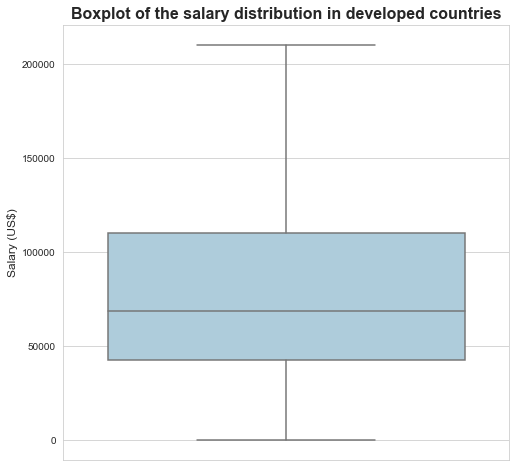

In [30]:
# Analysing the boxplots individually
fig = plt.gcf()
fig.set_size_inches( 8, 8)

plt.title("Boxplot of the salary distribution in developed countries",fontsize= 16, fontweight='bold' )
ax = sns.boxplot(y= df_dev["ConvertedComp"],showfliers = False)
ax.set_ylabel("Salary (US$)",fontsize=12)


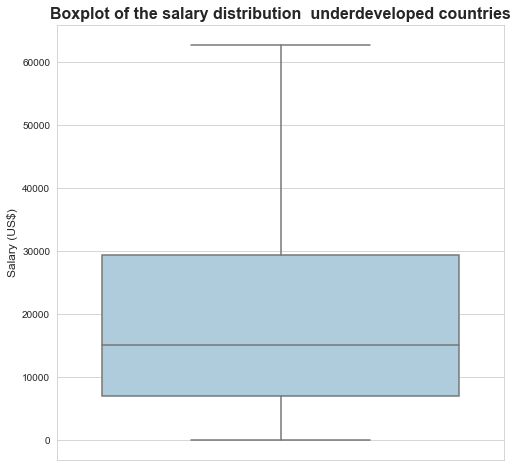

In [31]:
fig = plt.gcf()
fig.set_size_inches( 8, 8)

plt.title("Boxplot of the salary distribution  underdeveloped countries",fontsize= 16, fontweight='bold' )
ax = sns.boxplot(y= df_under["ConvertedComp"],showfliers = False)
ax.set_ylabel("Salary (US$)",fontsize=12)
plt.savefig('1', dpi=600)

## As we can see the mean salary is very different:   US 128243 for the developed countries and US 30796 for the underdeveloped. This is expected as the currency of the underdeveloped countries is less valuable than that of the most developed (this reflects as the data is converted to US dollars).
## At first glance the distribution of the salaries is different between the two groups (as in the first boxplot), but if we separate the analysis we can see that they have very similar distribution (as we can see in the two others boxplots), in both there are a lot of outliers that were supressed for better readability of the graphs.

## Now let's see the education

In [32]:
# Creating a dictionary to rename the education column to fit in the graphs
edu_dict = {'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': "Bachelor's",
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': "Master’s",
       'Some college/university study without earning a degree': "No deegree",
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)' : "Secondary school",
       'Other doctoral degree (Ph.D., Ed.D., etc.)': "Other doctoral",
       'Associate degree (A.A., A.S., etc.)': "Associate degree",
       'Professional degree (JD, MD, etc.)': "Professional degree",
       'Primary/elementary school': 'Primary',
       'I never completed any formal education': "None"}

In [33]:
# Renaming both DFs
df_dev['EdLevel'].replace(edu_dict, inplace=True)
df_under['EdLevel'].replace(edu_dict, inplace=True)

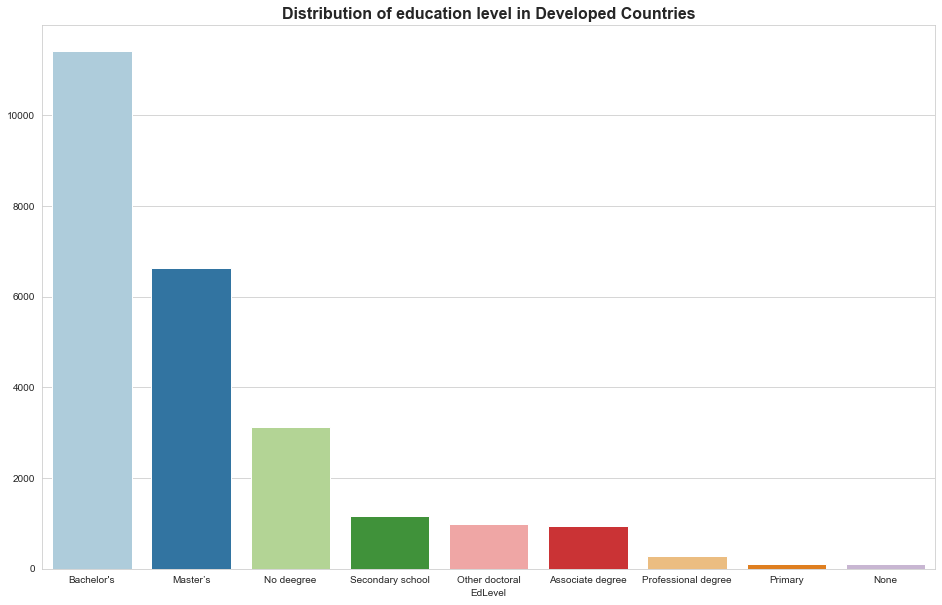

In [34]:
# Creating the Graph of the distribution of education in developed countries
ed_level_dev = df_dev.groupby(by = 'EdLevel').count().sort_values(by = "Respondent", ascending=False).Respondent
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.title("Distribution of education level in Developed Countries",fontsize= 16, fontweight='bold' )
ax = sns.barplot(ed_level_dev.index, ed_level_dev.values)


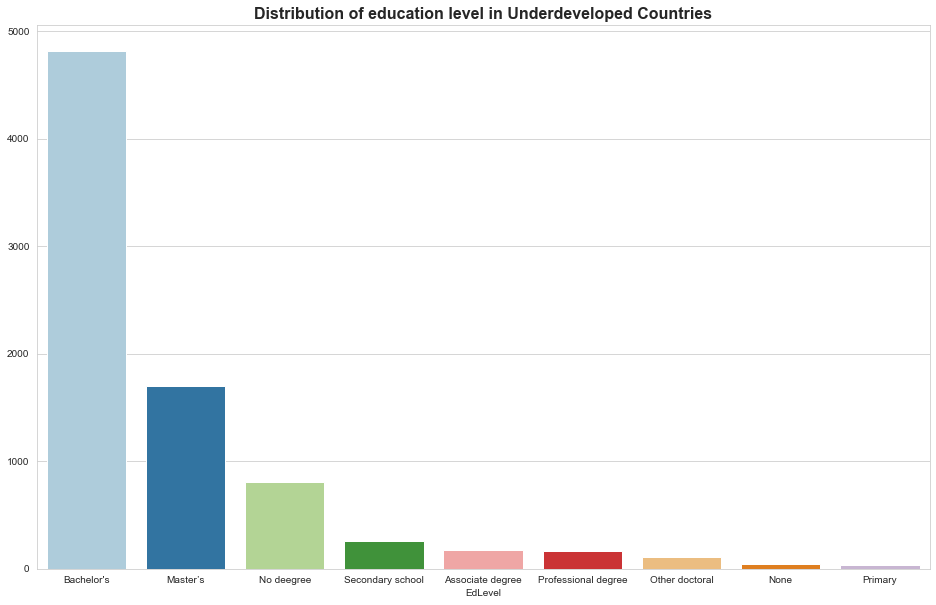

In [35]:
# Creating the Graph of the distribution of education in underdeveloped countries
ed_level_und = df_under.groupby(by = 'EdLevel').count().sort_values(by = "Respondent", ascending=False).Respondent
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.title("Distribution of education level in Underdeveloped Countries",fontsize= 16, fontweight='bold' )
ax = sns.barplot(ed_level_und.index, ed_level_und.values)
plt.savefig('1', dpi=600)

In [36]:
# Dataframe with the normalized education distribution for both class of countries and
# the difference between Developed and Undeloveped countries
ed = pd.DataFrame(data= [df_dev.EdLevel.value_counts(normalize=True), df_under.EdLevel.value_counts(normalize=True)],
                  index=['Developed', 'Underdeveloped']).transpose()
ed["Diff"] = ed.Developed - ed.Underdeveloped
ed = ed.reindex(['None', 'No deegree','Primary', 'Secondary school','Professional degree',"Bachelor's",
                 'Associate degree',"Master’s",'Other doctoral'])

ed = ed.style.bar(subset=['Diff'], align='mid', color=['#d65f5f', '#5fba7d'])
ed

,Developed,Underdeveloped,Diff
None,0.003831,0.005541,-0.001710
No deegree,0.126265,0.099126,0.027140
Primary,0.004476,0.004556,-0.000080
Secondary school,0.047102,0.031277,0.015826
Professional degree,0.011493,0.020933,-0.009440
Bachelor's,0.460499,0.593030,-0.132531
Associate degree,0.038351,0.022042,0.016310
Master’s,0.267976,0.209826,0.058150
Other doctoral,0.040005,0.013668,0.026337


## The main difference in the two groups education level is in the Bachelor's degree, with a surplus of more than 13% for the underdeveloped countries. We can see that this also reflects a advantage for superior educational degree in the  higher levels of education

## Maybe the main difference lies in the experience? I will divide the data into 5 classes. The idea is somehow to emulate the market division of worker experience. The classes are: 0-3, 3-5, 5-10,10-20 and above 20.

In [37]:
# Creating classes for years of coding

#First replace the two entries that are string and drop the NANs (0.3420%)
df_dev['YearsCode'].replace({"More than 50 years": 50, "Less than 1 year": 1}, inplace=True)
df_dev = df_dev.dropna(subset= ["YearsCode"],axis = 0)
df_dev.YearsCode = df_dev.YearsCode.astype(int)

#Creating the classes
df_dev.loc[df_dev['YearsCode'] <= 3, 'YearsCode_cod'] = 'max of 3 yrs'
df_dev.loc[(df_dev['YearsCode'] > 3) & (df_dev['YearsCode'] <= 5), 'YearsCode_cod']= 'between 3 and 5 years'
df_dev.loc[(df_dev['YearsCode']  > 5) & (df_dev['YearsCode'] <= 10) , 'YearsCode_cod' ] = 'between 5 and 10 years'
df_dev.loc[(df_dev['YearsCode']  > 10) & (df_dev['YearsCode'] <= 20) , 'YearsCode_cod' ] = 'between 10 and 20 years'
df_dev.loc[df_dev['YearsCode'] > 20, 'YearsCode_cod'] = 'more than 20 yrs'



In [38]:
# Checking
df_dev.YearsCode_cod.value_counts().index

Index(['between 10 and 20 years', 'between 5 and 10 years', 'more than 20 yrs',
       'between 3 and 5 years', 'max of 3 yrs'],
      dtype='object')

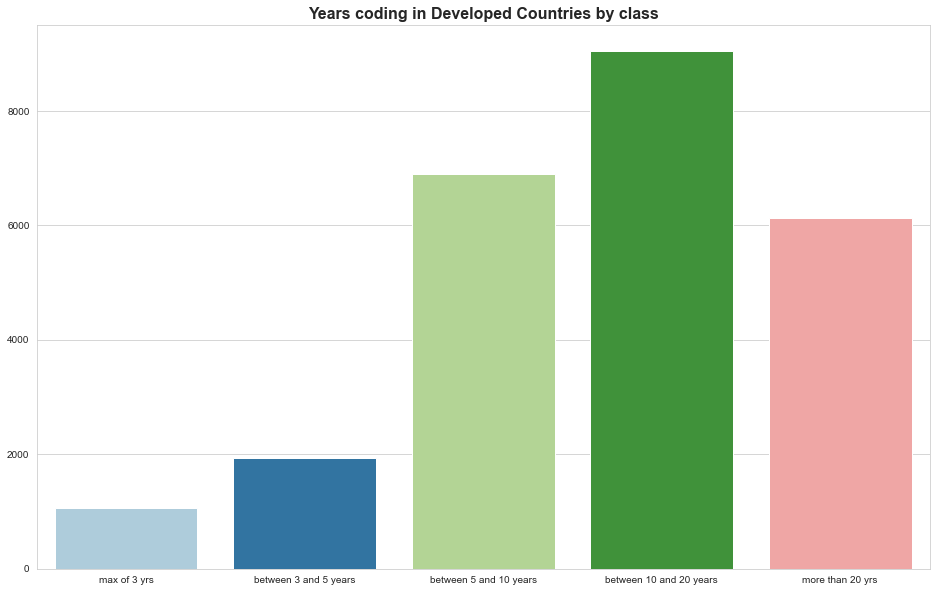

In [39]:
# Plotting
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.title("Years coding in Developed Countries by class",fontsize= 16, fontweight='bold' )
ax = sns.barplot(df_dev.YearsCode_cod.value_counts().index, df_dev.YearsCode_cod.value_counts().values,
                 order = ['max of 3 yrs','between 3 and 5 years',  'between 5 and 10 years',
                          'between 10 and 20 years', 'more than 20 yrs',
       ])



In [40]:
# Creating classes for years of coding 
df_under['YearsCode'].replace({"More than 50 years": 50, "Less than 1 year": 1}, inplace=True)
df_under = df_under.dropna(subset= ["YearsCode"],axis = 0)
df_under.YearsCode = df_under.YearsCode.astype(int)
df_under.loc[df_under['YearsCode'] <= 3, 'YearsCode_cod'] = 'max of 3 yrs'
df_under.loc[(df_under['YearsCode'] > 3) & (df_under['YearsCode'] <= 5), 'YearsCode_cod']= 'between 3 and 5 years'
df_under.loc[(df_under['YearsCode']  > 5) & (df_under['YearsCode'] <= 10) ,
             'YearsCode_cod' ] = 'between 5 and 10 years'
df_under.loc[(df_under['YearsCode']  > 10) & (df_under['YearsCode'] <= 20) ,
             'YearsCode_cod' ] = 'between 10 and 20 years'
df_under.loc[df_under['YearsCode'] > 20, 'YearsCode_cod'] = 'more than 20 yrs'


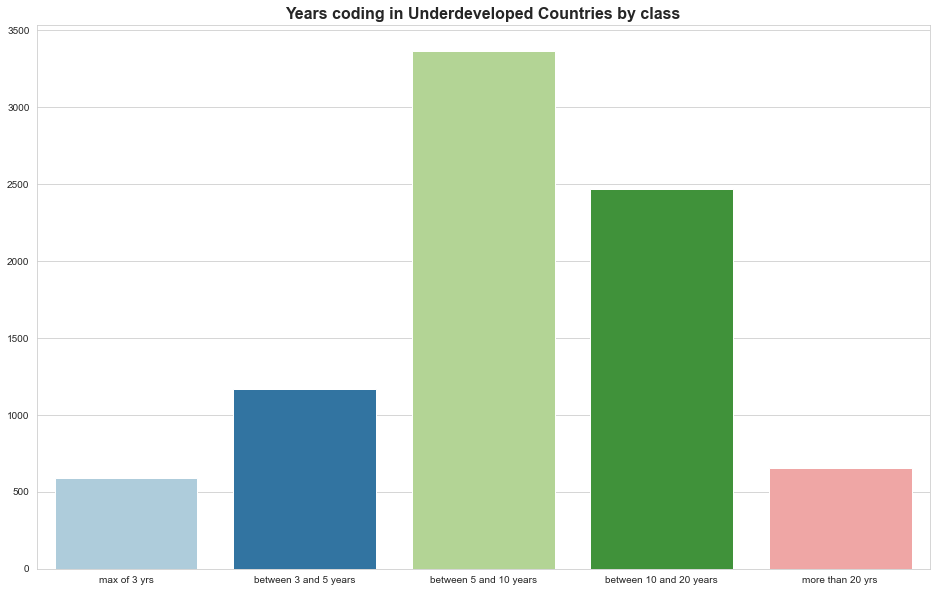

In [42]:
# Plotting
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.title("Years coding in Underdeveloped Countries by class",fontsize= 16, fontweight='bold' )
ax = sns.barplot(df_under.YearsCode_cod.value_counts().index, df_under.YearsCode_cod.value_counts().values,
                 order = ['max of 3 yrs','between 3 and 5 years',
                          'between 5 and 10 years','between 10 and 20 years', 'more than 20 yrs',
       ])



In [44]:
# Dataframe with the normalized years coding distribution for both class of countries and the difference between Developed and Undeloveped countries
yrs = pd.DataFrame(data= [df_dev.YearsCode_cod.value_counts(normalize=True),
                          df_under.YearsCode_cod.value_counts(normalize=True)],
                   index=['Developed', 'Underdeveloped']).transpose()

yrs["Diff"] = yrs.Developed - yrs.Underdeveloped
yrs = yrs.reindex(['max of 3 yrs', 'between 3 and 5 years','between 5 and 10 years','between 10 and 20 years',
                   'more than 20 yrs'])
yrs = yrs.style.bar(subset=['Diff'], align='mid', color=['#d65f5f', '#5fba7d'])
yrs

,Developed,Underdeveloped,Diff
max of 3 yrs,0.042401,0.071611,-0.029210
between 3 and 5 years,0.077429,0.141522,-0.064093
between 5 and 10 years,0.275086,0.408302,-0.133216
between 10 and 20 years,0.360485,0.299308,0.061176
more than 20 yrs,0.244600,0.079257,0.165343


## This trend is the same in the years coding without the education time coding ?

In [45]:
# Creating classes for years of coding without education
df_dev['YearsCodePro'].replace({"More than 50 years": 50, "Less than 1 year": 1}, inplace=True)
df_dev = df_dev.dropna(subset= ["YearsCodePro"],axis = 0)
df_dev.YearsCodePro = df_dev.YearsCodePro.astype(int)
df_dev.loc[df_dev['YearsCodePro'] <= 3, 'YearsCodePro_cod'] = 'max of 3 yrs'
df_dev.loc[(df_dev['YearsCodePro'] > 3) & (df_dev['YearsCodePro'] <= 5), 'YearsCodePro_cod']= 'between 3 and 5 years'
df_dev.loc[(df_dev['YearsCodePro']  > 5) & (df_dev['YearsCodePro'] <= 10) , 'YearsCodePro_cod' ] = 'between 5 and 10 years'
df_dev.loc[(df_dev['YearsCodePro']  > 10) & (df_dev['YearsCodePro'] <= 20) , 'YearsCodePro_cod' ] = 'between 10 and 20 years'
df_dev.loc[df_dev['YearsCodePro'] > 20, 'YearsCodePro_cod'] = 'more than 20 yrs'

In [46]:
# Creating classes for years of coding without education
df_under['YearsCodePro'].replace({"More than 50 years": 50, "Less than 1 year": 1}, inplace=True)
df_under = df_under.dropna(subset= ["YearsCodePro"],axis = 0)
df_under.YearsCodePro = df_under.YearsCodePro.astype(int)
df_under.loc[df_under['YearsCodePro'] <= 3, 'YearsCodePro_cod'] = 'max of 3 yrs'
df_under.loc[(df_under['YearsCodePro'] > 3) & (df_under['YearsCodePro'] <= 5), 'YearsCodePro_cod']= 'between 3 and 5 years'
df_under.loc[(df_under['YearsCodePro']  > 5) & (df_under['YearsCodePro'] <= 10) , 'YearsCodePro_cod' ] = 'between 5 and 10 years'
df_under.loc[(df_under['YearsCodePro']  > 10) & (df_under['YearsCodePro'] <= 20) , 'YearsCodePro_cod' ] = 'between 10 and 20 years'
df_under.loc[df_under['YearsCodePro'] > 20, 'YearsCodePro_cod'] = 'more than 20 yrs'

In [47]:
# Dataframe with the normalized years coding distribution for both class of countries and the difference between Developed and Undeloveped countries
yrs = pd.DataFrame(data= [df_dev.YearsCodePro_cod.value_counts(normalize=True), df_under.YearsCodePro_cod.value_counts(normalize=True)], index=['Developed', 'Underdeveloped']).transpose()
yrs["Diff"] = yrs.Developed - yrs.Underdeveloped
yrs = yrs.reindex(['max of 3 yrs', 'between 3 and 5 years','between 5 and 10 years','between 10 and 20 years',
                   'more than 20 yrs'])
yrs = yrs.style.bar(subset=['Diff'], align='mid', color=['#d65f5f', '#5fba7d'])
yrs

,Developed,Underdeveloped,Diff
max of 3 yrs,0.268855,0.399683,-0.130829
between 3 and 5 years,0.155268,0.204778,-0.049510
between 5 and 10 years,0.254162,0.240980,0.013182
between 10 and 20 years,0.222981,0.129205,0.093776
more than 20 yrs,0.098734,0.025353,0.073381


## As we can see there is a great difference between the groups of countries. The underdeveloped ones has young (in terms of years coding) coders, with the max difference in the middle category (5-10 years) without the education time with 13% surplus in comparison with the developed ones. This trends shifts drastically in the two older categories, mainly in the last one with a 16% difference in favor of the developed countries.
## There is a change when we subtract the education time. The main difference with this data is for the younger coders, with a advantage of 13% for the underdeveloped countries. But the trend in favor of the developed countries having older coders sustains.
## We can infer that without education the years of coding data gets shifted to younger classes.

# This trend reflects in the mean age in the groups:

In [48]:
#Developed countries
df_dev.Age.mean()

33.17851523449385

In [49]:
#Underdeveloped countries
df_under.Age.mean()

28.890506937766176

# Let's look at the extra hours worked.

In [50]:
# Dataframe with the normalized overtime worked distribution for both class of countries and the difference between Developed and Undeloveped countries
over = pd.DataFrame(data= [df_dev.NEWOvertime.value_counts(normalize=True),
                           df_under.NEWOvertime.value_counts(normalize=True)],
                    index=['Developed', 'Underdeveloped']).transpose()
over["Diff"] = over.Developed - over.Underdeveloped
over = over.reindex(['Never', 'Rarely: 1-2 days per year or less','Occasionally: 1-2 days per quarter but less than monthly',
              'Sometimes: 1-2 days per month but less than weekly', 'Often: 1-2 days per week or more'])
over = over.style.bar(subset=['Diff'], align='mid', color=['#d65f5f', '#5fba7d'])

over

,Developed,Underdeveloped,Diff
Never,0.121331,0.074329,0.047002
Rarely: 1-2 days per year or less,0.161548,0.120970,0.040578
Occasionally: 1-2 days per quarter but less than monthly,0.233881,0.195668,0.038213
Sometimes: 1-2 days per month but less than weekly,0.262751,0.287472,-0.024722
Often: 1-2 days per week or more,0.220489,0.321560,-0.101071


## The general trend in this shows us that the underdeveloped countries have a larger proportion of their coders working more than the normal, including having the larger difference in the group with more working hours.